# Loading csv and cleaning

In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [26]:
df_churn = pd.read_csv('/Users/romai/Projets ML/bank_churn/data/customer_churn_records.csv')
df_churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

# Brief description of the variables

- RowNumber—corresponds to the record (row) number and has no effect on the output. 
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

In [27]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [28]:
df_churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

# Data quality check

In [29]:
# Does it contain any NaN ?
df_churn.isnull().values.any()

False

Next, we do some data quality check using crosstab with selected variables to detect any inconsistency. 

In [30]:
# Crosstab
def get_crosstab(var1, var2):
    
    "get a crosstab with two variables"
    
    crosstab = pd.crosstab(var1, var2)
    
    return(crosstab)

In [31]:
get_crosstab(var1 = df_churn['Card Type'], var2 = df_churn['IsActiveMember'])

IsActiveMember     0     1
Card Type                 
DIAMOND         1265  1242
GOLD            1189  1313
PLATINUM        1201  1294
SILVER          1194  1302

In [32]:
get_crosstab(var1 = df_churn['HasCrCard'], var2 = df_churn['IsActiveMember'])

IsActiveMember     0     1
HasCrCard                 
0               1401  1544
1               3448  3607

In [34]:
get_crosstab(var1 = df_churn['HasCrCard'], var2 = df_churn['hascrcard'])

KeyError: 'cardtype'

# Loading csv and preprocessing

In [4]:
df_churn = pd.read_csv('/Users/romai/Projets ML/bank_churn/intermediate/df_prepro.csv').drop(['Unnamed: 0', 'rownumber'], axis = 1)

df_churn.head()

creditscore geography  gender  age  tenure    balance  numofproducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  exited  complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   satisfaction score card type  point earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

## Brief description of the variables

- RowNumber—corresponds to the record (row) number and has no effect on the output. 
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

In [5]:
# Remove spaces in column names
df_churn.columns = df_churn.columns.str.replace(' ', '')
df_churn.head()

creditscore geography  gender  age  tenure    balance  numofproducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  exited  complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   satisfactionscore cardtype  pointearned  
0                  2  DIAMOND          464  
1                  3  DIAMOND          456  
2                  3  DIAMOND          377  
3                  5     GOLD          350  
4                  5     GOLD          425

## Discretization and dichotomization

List of continuous variables : 
- creditscore
- tenure
- estimatedsalary
- pointearned
- numofproducts
- balance

In [6]:
df_churn = pd.read_csv('/Users/romai/Projets ML/bank_churn/intermediate/df_prepro.csv').drop(['Unnamed: 0', 'rownumber'], axis = 1)
df_churn.columns = df_churn.columns.str.replace(' ', '')

list_continuous = ['creditscore', 'tenure', 'estimatedsalary', 'pointearned', 'age']

for i in list_continuous:
    quantiles = df_churn[i].quantile([0, .25, .5, .75, 1])
    discrete = pd.cut(x = df_churn[i], 
                             bins = quantiles,
                             labels = [0, 1, 2, 3], 
                     include_lowest = True)
    dicho = pd.get_dummies(data = discrete, 
                                  prefix = i)
    df_churn = df_churn.join(dicho)

Still to dichotomize : 
- numofproducts
- balance

In [7]:
# Balance
quant_balance = df_churn['balance'].quantile([0, .25, .5, .75, 1])
discrete_balance = pd.cut(x = df_churn['balance'], 
                            bins = quantiles,
                            labels = [0, 1, 2, 3],
                         include_lowest = True)
dicho_balance = pd.get_dummies(data = discrete_balance, 
                                  prefix = 'balance')
df_churn = df_churn.join(dicho_balance)

# Numofproducts
quant_balance = df_churn['numofproducts'].quantile([0, .25, .5, .75, 1])
discrete_numprod = pd.cut(x = df_churn['numofproducts'], 
                            bins = quantiles,
                            labels = [0, 1, 2, 3], 
                         include_lowest = True)
dicho_numprod = pd.get_dummies(data = discrete_numprod, 
                                  prefix = 'numofproducts')
df_churn = df_churn.join(dicho_numprod)

In [8]:
df_churn.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'complain', 'satisfactionscore', 'cardtype', 'pointearned',
       'creditscore_0', 'creditscore_1', 'creditscore_2', 'creditscore_3',
       'tenure_0', 'tenure_1', 'tenure_2', 'tenure_3', 'estimatedsalary_0',
       'estimatedsalary_1', 'estimatedsalary_2', 'estimatedsalary_3',
       'pointearned_0', 'pointearned_1', 'pointearned_2', 'pointearned_3',
       'age_0', 'age_1', 'age_2', 'age_3', 'balance_0', 'balance_1',
       'balance_2', 'balance_3', 'numofproducts_0', 'numofproducts_1',
       'numofproducts_2', 'numofproducts_3'],
      dtype='object')

In [9]:
df_churn.head()

creditscore geography  gender  age  tenure    balance  numofproducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  ...  age_2  age_3  balance_0  \
0          1               1        101348.88  ...      1      0          0   
1          0               1        112542.58  ...      1      0          0   
2          1               0        113931.57  ...      1      0          0   
3          0               0         93826.63  ...      1      0          0   
4          1               1         79084.10  ...      1      0          0   

  balance_1  balance_2  balance_3  numofproducts_0  numofproducts_1  \
0         0          0          0                0                0   
1         0          0          0                0                0   
2         0          0          0                0                0   
3         0          0          0                0                0   
4         0          0          0                0                0   

   numofproducts_2  numofproducts_3  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 43 columns]

In [10]:
# Is there any NaN ? 
df_churn.isnull().values.any()
# No

False

## Dichotomization gender and geography

In [11]:
for i in ['geography', 'gender', 'cardtype']:
    dicho = pd.get_dummies(data = df_churn[i], 
                                  prefix = i)
    df_churn = df_churn.join(dicho)

In [12]:
df_churn.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited', 'complain', 'satisfactionscore', 'cardtype', 'pointearned',
       'creditscore_0', 'creditscore_1', 'creditscore_2', 'creditscore_3',
       'tenure_0', 'tenure_1', 'tenure_2', 'tenure_3', 'estimatedsalary_0',
       'estimatedsalary_1', 'estimatedsalary_2', 'estimatedsalary_3',
       'pointearned_0', 'pointearned_1', 'pointearned_2', 'pointearned_3',
       'age_0', 'age_1', 'age_2', 'age_3', 'balance_0', 'balance_1',
       'balance_2', 'balance_3', 'numofproducts_0', 'numofproducts_1',
       'numofproducts_2', 'numofproducts_3', 'geography_France',
       'geography_Germany', 'geography_Spain', 'gender_Female', 'gender_Male',
       'cardtype_DIAMOND', 'cardtype_GOLD', 'cardtype_PLATINUM',
       'cardtype_SILVER'],
      dtype='object')

## Saving the dataset

In [13]:
filepath = Path('/Users/romai/Projets ML/bank_churn/output/df_churn_ml.csv') 
df_churn.to_csv(filepath)

# Machine Learning algorithms

In [14]:
df_ml = pd.read_csv(filepath).drop(['Unnamed: 0'], axis = 1)
df_ml.head()

creditscore geography  gender  age  tenure    balance  numofproducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  ...  numofproducts_3  \
0          1               1        101348.88  ...                0   
1          0               1        112542.58  ...                0   
2          1               0        113931.57  ...                0   
3          0               0         93826.63  ...                0   
4          1               1         79084.10  ...                0   

   geography_France  geography_Germany geography_Spain  gender_Female  \
0                 1                  0               0              1   
1                 0                  0               1              1   
2                 1                  0               0              1   
3                 1                  0               0              1   
4                 0                  0               1              1   

   gender_Male  cardtype_DIAMOND  cardtype_GOLD  cardtype_PLATINUM  \
0            0                 1              0                  0   
1            0                 1              0                  0   
2            0                 1              0                  0   
3            0                 0              1                  0   
4            0                 0              1                  0   

   cardtype_SILVER  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 52 columns]

In [15]:
target = df_ml['exited']
features = df_ml.drop(['exited', 'cardtype', 'gender', 'geography'], axis = 1) # drop non string columns

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

## Standardisation

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic  Regression

### Constructing the model

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

### Evaluating of the model

In [20]:
pd.crosstab(y_test, y_pred_lr, rownames = ['Classe reelle'] , colnames = ['Classe predite'] )

Classe predite     0    1
Classe reelle            
0               1562    3
1                  4  431

In [21]:
# Accuracy score
lr.score(X_test, y_test)

0.9965

In [22]:
# Precision score
precision_score(y_true = y_test, y_pred = y_pred_lr)

0.9930875576036866

In [23]:
print(classification_report(y_true = y_test, y_pred = y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1565
           1       0.99      0.99      0.99       435

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



The model has good performances !

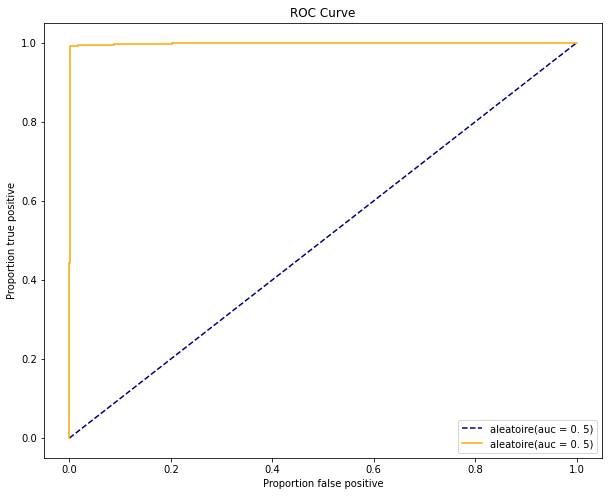

In [24]:
# Creation matplotlib.pyplot figure
plt.figure(figsize=(10,8))

# Comuting proba of belonging in classes 
probs = lr.predict_proba(X_test)

# Computing roc_curve
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label = 1)

# Computing AUC
roc_auc = auc(fpr, tpr)

# Data
plt.plot( [0, 1], [0, 1], '--', label = 'aleatoire(auc = 0. 5)', color = 'navy')
plt.plot(fpr, tpr, label = 'aleatoire(auc = 0. 5)', color = 'orange' )

# Customization
plt.xlabel('Proportion false positive')
plt.ylabel('Proportion true positive')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')

Logistic Regression is virtually perfect, despite the weird 